# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from datetime import datetime
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

import os


# # Import API key
# from config import (openweathermapy,gKey)
# import gmaps

# # Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy


# # Output File (CSV)
# output_data_file = "output_data/cities.csv"

# # Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)

## Generate Cities List

In [2]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# settings = {"units": "imperial", "appid": openweathermapy}
# summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
# cities_df = pd.DataFrame(["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
# print("Beginning Data Retrieval")
# print("-----------------------------")
# counter = 0
# weather_data = []
# for city in cities:
#     try:
#         weather_data.append(ow.get_current(city, **settings))
#         counter = counter +1
#         print(f"Processing Record {counter} of {len(cities)} | {city}")
#     except:
#         print(f"City not found. Skipping... {city}")
# print("-----------------------------")
# print("Data Retrieval Complete")      
# print("-----------------------------")


In [4]:
# summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
# column_names=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

# # Create a Pandas DataFrame with the results
# data = [response(*summary) for response in weather_data]

# cities_df = pd.DataFrame(data,columns=column_names)
# cities_df["Date"] = pd.to_datetime(cities_df["Date"],unit='s')
# cities_df.head()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# # Convert Raw Data to DataFrame
# # Export the city data into a .csv.
# cities_df.to_csv(output_data_file)
# # Display the DataFrame
# cities_df.count()

In [31]:
# Read cities.csv created through API calls in commented code above
cities=pd.read_csv('Resources\cities.csv')
cities.rename(columns={'Max Temp':'MaxTemp'}, inplace=True)
cities.rename(columns={'Wind Speed':'WindSpeed'}, inplace=True)
cities.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,0,Hasaki,75,JP,2019-03-22 00:16:38,88,35.73,140.83,63.00,9.17
1,1,Barrow,44,AR,2019-03-22 00:28:25,78,-38.31,-60.23,54.23,8.32
2,2,Arraial do Cabo,90,BR,2019-03-21 23:00:00,94,-22.97,-42.02,71.60,16.26
3,3,Bulawayo,0,ZW,2019-03-22 00:28:25,89,-20.16,28.59,60.62,4.97
4,4,Hithadhoo,76,MV,2019-03-22 00:28:25,100,-0.60,73.08,84.56,5.75


In [32]:
#Read countries.csv to add countries and continent 
countries=pd.read_csv('Resources\countries.csv', encoding='latin-1')
countries.rename(columns={'Country':'CountryName'}, inplace=True)
countries.rename(columns={'CountryCode':'Country'}, inplace=True)
countries.head()

,Country,CountryCode1,CountryName,Continent,Ccode,CountryNo
0,AF,AFG,Afghanistan,Asia,AS,4
1,AL,ALB,Albania,Europe,EU,8
2,AQ,ATA,Antarctica,Antarctica,AN,10
3,DZ,DZA,Algeria,Africa,AF,12
4,AS,ASM,American Samoa,Oceania,OC,16


In [33]:

cities_df = pd.merge(cities, countries[['Country','CountryName', 'Continent']], on=['Country'])
cities_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed,CountryName,Continent
0,0,Hasaki,75,JP,2019-03-22 00:16:38,88,35.73,140.83,63.00,9.17,Japan,Asia
1,217,Gushikawa,75,JP,2019-03-22 00:23:10,78,26.35,127.87,71.60,14.99,Japan,Asia
2,325,Katsuura,75,JP,2019-03-22 00:17:30,66,33.93,134.50,55.00,18.34,Japan,Asia
3,327,Kushima,75,JP,2019-03-22 00:23:09,62,31.50,131.29,59.00,14.99,Japan,Asia
4,329,Tateyama,75,JP,2019-03-22 00:27:36,81,36.66,137.31,51.01,8.05,Japan,Asia


In [34]:
#We'll configure the notebook for use in offline mode
init_notebook_mode(connected=True)

In [50]:
N = len(cities_df)
x = cities_df.Lat
y = cities_df.MaxTemp
colors = np.random.rand(N)
sz = np.random.rand(N)*30

fig = go.Figure()

fig.add_scatter(x=x,
                y=y,
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });

# layout = dict(title = 'Styled Scatter')

# fig = dict(data=data, layout=layout)
# py.iplot(fig, filename='styled-scatter')
iplot(fig)


if not os.path.exists('Images'):
    os.mkdir('Images')
    
pio.write_image(fig, 'Images/LatitudeMaxTemp-Scatter.png')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

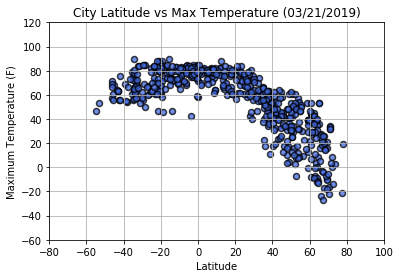

In [11]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.xlim(-80,100)
plt.ylim(-60,120)
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeMaxTemp-Scatter.png", bbox_inches='tight')

#### Latitude vs. Humidity Plot

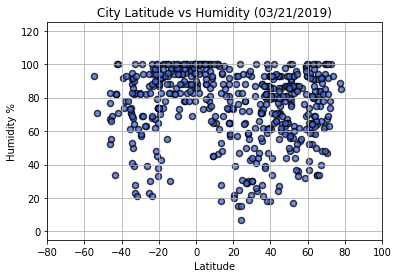

In [12]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Humidity"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.xlim(-80,100)
plt.ylim(-5,125)
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeHumidity-Scatter.png", bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

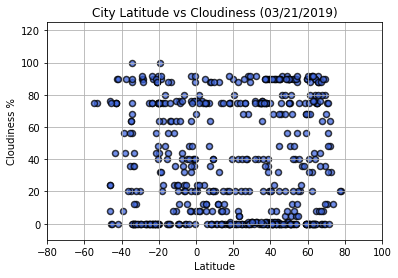

In [13]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(-80,100)
plt.ylim(-10,125)
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeCloudiness-Scatter.png", bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

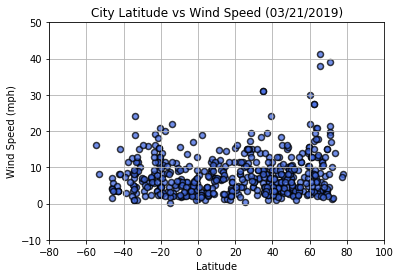

In [14]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.ylim(-10,50)
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeWindSpeed-Scatter.png", bbox_inches='tight')

In [10]:
############## Code below is working but I only want to learn how to use gmaps.  ###################################

# gmaps.configure(api_key=gKey)
# # Store latitude and longitude in locations
# locations = cities_df[["Lat", "Lng"]].astype(float)
# humidity = cities_df["Humidity"].astype(float)
# # Plot Heatmap
# fig = gmaps.figure()

# # Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)


# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig =gmaps.figure(layout={
#         'width': '1120px',
#         'height': '420px',
#         'padding': '3px',
#         'border': '1px solid black'
# })
# fig


## Analysis

<li>Temperatures are higher near the equator.</li>
<li>There is no relationship between Latitude and Humidity.</li>
<li>There is no relationship between Latitude and Cloudiness.</li>
<li>There is no relationship between Latitude and Wind Speed.</li>